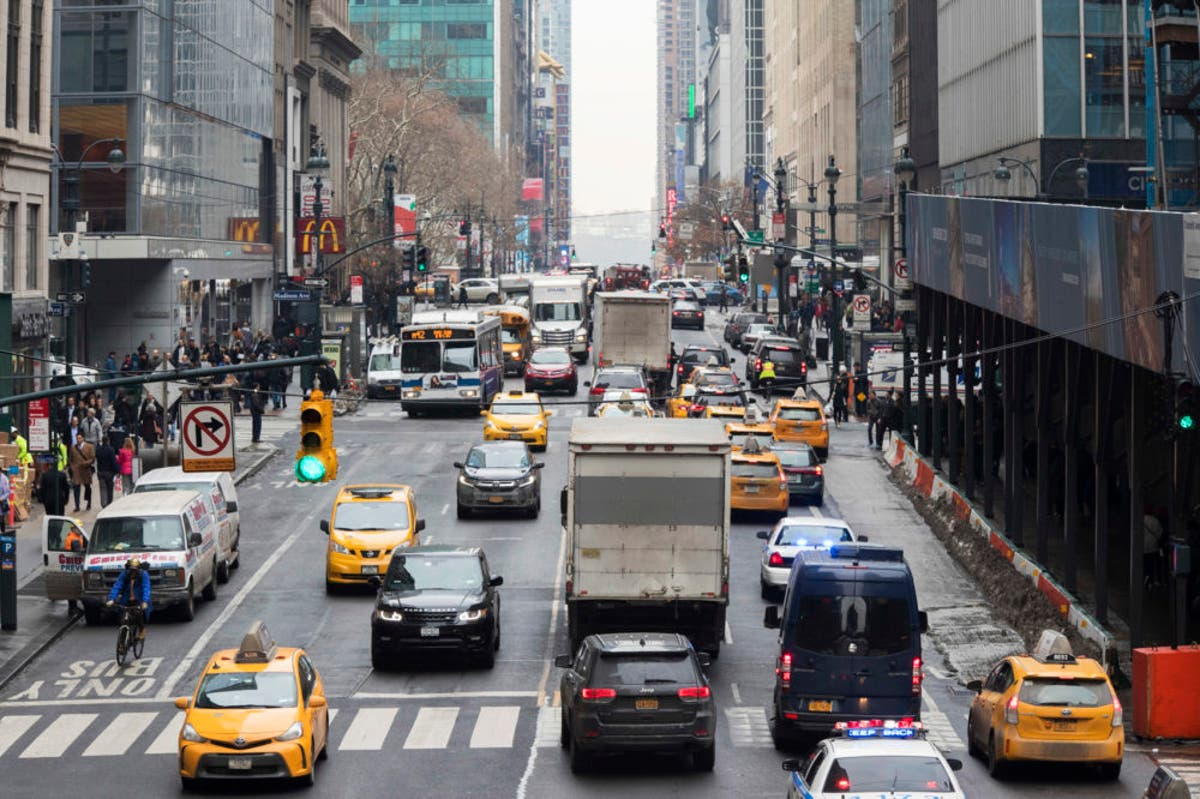

This project deals with diiferent ascpects of supervised learning, neural networks ,audio data analysis, applications of sound processing & analysis and feature extraction using Python.

### **Task**
To classify some audio files into thier respective, the dataset given is named as UrbanSound8K, which contains about 9000 audio files of 10 different classes.

The classes and thier respective class IDs are listed below

* 0 : air_conditioner

* 1 : car_horn

* 2 : children_playing

* 3 : dog_bark

* 4 : drilling

* 5 : enginge_idling

* 6 : gun_shot

* 7 : jackhammer

* 8 : siren

* 9 : street_music

# Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import librosa


import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
filterwarnings("ignore")

# Read Data

In [2]:
df_ = pd.read_csv("../input/urbansound8k/UrbanSound8K.csv")
df = df_.copy()
df.head(5)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [3]:
folder_path = "../input/urbansound8k"

folds = os.listdir(folder_path)
print(folds)

['fold7', 'fold1', 'fold3', 'fold5', 'fold10', 'UrbanSound8K.csv', 'fold9', 'fold8', 'fold4', 'fold2', 'fold6']


In [4]:
fold_paths = [os.path.join(folder_path, i) for i in folds]
fold_paths

['../input/urbansound8k/fold7',
 '../input/urbansound8k/fold1',
 '../input/urbansound8k/fold3',
 '../input/urbansound8k/fold5',
 '../input/urbansound8k/fold10',
 '../input/urbansound8k/UrbanSound8K.csv',
 '../input/urbansound8k/fold9',
 '../input/urbansound8k/fold8',
 '../input/urbansound8k/fold4',
 '../input/urbansound8k/fold2',
 '../input/urbansound8k/fold6']

In [5]:
import random

# Shuffling the folder paths inorder to aviod biased loeading of data
random.shuffle(fold_paths)
fold_paths

['../input/urbansound8k/fold5',
 '../input/urbansound8k/fold6',
 '../input/urbansound8k/fold10',
 '../input/urbansound8k/fold2',
 '../input/urbansound8k/fold3',
 '../input/urbansound8k/fold1',
 '../input/urbansound8k/UrbanSound8K.csv',
 '../input/urbansound8k/fold7',
 '../input/urbansound8k/fold4',
 '../input/urbansound8k/fold8',
 '../input/urbansound8k/fold9']

# Preprocessing

In [6]:
data_paths = []
for i in range(11):
    
    curr_folder_path = fold_paths[i]
    
    if (curr_folder_path == "../input/urbansound8k/UrbanSound8K.csv"):
        continue
    
    curr_files = os.listdir(curr_folder_path)
    
    file_paths = [os.path.join(curr_folder_path, file) for file in curr_files]
    
    for j in range(len(file_paths)):
        curr_file = curr_files[j]
        class_id = df[df['slice_file_name'] == curr_file]
        arr = np.array(class_id['classID'])

        data_paths.append([file_paths[j], arr[0]])

In [7]:
print(f"First 5 elements of data_paths:\n{data_paths[0:5]}\n")
print(f"Shape of data_paths: {len(data_paths)}\n")
print(f"First 5 elements of file_paths:\n{file_paths[0:5]}")

First 5 elements of data_paths:
[['../input/urbansound8k/fold5/162432-6-7-0.wav', 6], ['../input/urbansound8k/fold5/104421-2-0-3.wav', 2], ['../input/urbansound8k/fold5/72259-1-7-3.wav', 1], ['../input/urbansound8k/fold5/113601-9-0-34.wav', 9], ['../input/urbansound8k/fold5/100852-0-0-22.wav', 0]]

Shape of data_paths: 8732

First 5 elements of file_paths:
['../input/urbansound8k/fold9/13579-2-0-48.wav', '../input/urbansound8k/fold9/52411-9-0-52.wav', '../input/urbansound8k/fold9/39856-5-0-16.wav', '../input/urbansound8k/fold9/188823-7-1-3.wav', '../input/urbansound8k/fold9/60935-2-0-15.wav']


In [8]:
def create_spectrogram(y):
    spec = librosa.feature.melspectrogram(y=y)
    spec_conv = librosa.amplitude_to_db(spec, ref=np.max)
    return spec_conv

## Create Spectrograms and Save These with Labels

In [9]:
final_df = pd.DataFrame()
print("----------- Process Start -----------\n")
print(f"{len(data_paths)} spectrogram will be created!")
for i in range(len(data_paths)):
    y, sr = librosa.load(data_paths[i][0])
    spec = create_spectrogram(y)
    final_df = final_df.append({"spec": spec, "label":data_paths[i][1]}, ignore_index=True)
    
    # tracing
    if i % 200 == 0 and i != 0:
        print(f"{i} spectrogram has created, {int(len(data_paths)-i)} left!")


----------- Process Start -----------

8732 spectrogram will be created!
200 spectrogram has created, 8532 left!
400 spectrogram has created, 8332 left!
600 spectrogram has created, 8132 left!
800 spectrogram has created, 7932 left!
1000 spectrogram has created, 7732 left!
1200 spectrogram has created, 7532 left!
1400 spectrogram has created, 7332 left!
1600 spectrogram has created, 7132 left!
1800 spectrogram has created, 6932 left!
2000 spectrogram has created, 6732 left!
2200 spectrogram has created, 6532 left!
2400 spectrogram has created, 6332 left!
2600 spectrogram has created, 6132 left!
2800 spectrogram has created, 5932 left!
3000 spectrogram has created, 5732 left!
3200 spectrogram has created, 5532 left!
3400 spectrogram has created, 5332 left!
3600 spectrogram has created, 5132 left!
3800 spectrogram has created, 4932 left!
4000 spectrogram has created, 4732 left!
4200 spectrogram has created, 4532 left!
4400 spectrogram has created, 4332 left!
4600 spectrogram has created,

In [10]:
final_df.head()

,spec,label
0,"[[-80.0, -80.0, -80.0, -34.983177, -4.515465, ...",6.0
1,"[[-80.0, -66.80991, -63.96978, -66.44124, -68....",2.0
2,"[[-70.58094, -64.15515, -67.86066, -71.93075, ...",1.0
3,"[[-63.58013, -75.63795, -80.0, -80.0, -80.0, -...",9.0
4,"[[-15.478996, -15.785591, -23.825727, -25.6272...",0.0


In [11]:
print(final_df.shape)
print(df.shape)

(8732, 2)
(8732, 8)


In [12]:
X = final_df["spec"]
print(X.head())

print("--------------------------------------------------------")

y = final_df["label"].astype(int)
print(y.head())

0    [[-80.0, -80.0, -80.0, -34.983177, -4.515465, ...
1    [[-80.0, -66.80991, -63.96978, -66.44124, -68....
2    [[-70.58094, -64.15515, -67.86066, -71.93075, ...
3    [[-63.58013, -75.63795, -80.0, -80.0, -80.0, -...
4    [[-15.478996, -15.785591, -23.825727, -25.6272...
Name: spec, dtype: object
--------------------------------------------------------
0    6
1    2
2    1
3    9
4    0
Name: label, dtype: int64


In [13]:
size_list = [X[i].shape for i in range(len(X))]

In [14]:
size_list.count((128, 173))

7327

In [15]:
X_new = X
y_new = y
index_list = []
for i in range(len(X_new)):
    if X_new[i].shape != (128, 173):
        X_new = X_new.drop([i])
        y_new = y_new.drop([i])
        index_list.append(i)
        
        
X_new = X_new.reset_index(drop=True)
y_new = y_new.reset_index(drop=True)

print(f"X shape: {X_new.shape}")
print(f"y shape: {y_new.shape}")

X shape: (7327,)
y shape: (7327,)


## Train-Test Split and Normalization

To split the dataset with 80-10-10 ratio.
* Test: %80
* Validation: %10
* Train: %10

In [16]:
# TRAIN SETS
X_train = X_new[:5501].to_list()
X_train = np.asarray(X_train)
X_train = X_train.reshape(X_train.shape[0], 128, 173, 1)

y_train = y_new[:5501].to_list()
y_train = np.asarray(y_train)
y_train = to_categorical(y_train)

# VALIDATION SETS
X_val = X_new[5501:6414].to_list()
X_val = np.asarray(X_val)
X_val = X_val.reshape(X_val.shape[0], 128, 173, 1)

y_val = y_new[5501:6414].to_list()
y_val = np.asarray(y_val)
y_val = to_categorical(y_val)

# TEST SETS
X_test = X_new[6414:].to_list()
X_test = np.asarray(X_test)
X_test = X_test.reshape(X_test.shape[0], 128, 173, 1)

y_test = y_new[6414:].to_list()
y_test = np.asarray(y_test)
y_test = to_categorical(y_test)

# NORMALIZATION
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

print(f"X_train length: {len(X_train)}")
print(f"y_train length: {len(y_train)}")
print(f"X_val length: {len(X_val)}")
print(f"y_val length: {len(y_val)}")
print(f"X_test length: {len(X_test)}")
print(f"y_test length: {len(y_test)}")

X_train length: 5501
y_train length: 5501
X_val length: 913
y_val length: 913
X_test length: 913
y_test length: 913


# Constructing the Neural Network

In [17]:
model = tf.keras.Sequential()

# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(128,173,1)))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

# Add more convolution and max pooling layers
# 64 nodes randomly selected, can be adjusted later
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(128,173,1)))

model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(128,173,1)))

# Flatten the convolution layer
model.add(tf.keras.layers.Flatten())

# Add the dense layer and dropout layer
# The number 64 here is also random
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

# Add the output layer
model.add(tf.keras.layers.Dense(10, activation="softmax"))

2022-10-06 23:00:36.145785: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-06 23:00:36.241363: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-06 23:00:36.242168: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-06 23:00:36.244399: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 173, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 86, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 86, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 43, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 43, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 88064)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                5

In [19]:
# Compile the model
# If we looked 1D encoded => loss: "sparse_categorical_crossentropy"
# If we looked 2D encoded => loss: "categorical_crossentropy"
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train the Model

In [20]:
# Train the model for 50 epochs with batch size of 128
results = model.fit(X_train, y_train, 
                    batch_size=128,
                    epochs=50,
                    validation_data=(X_val, y_val))

2022-10-06 23:00:39.038464: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 487256576 exceeds 10% of free system memory.
2022-10-06 23:00:39.627411: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 487256576 exceeds 10% of free system memory.
2022-10-06 23:00:40.032751: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-10-06 23:00:41.517048: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


43/43 [==============================] - ETA: 0s - loss: 2.2770 - accuracy: 0.1129

2022-10-06 23:00:50.087018: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 80869888 exceeds 10% of free system memory.
2022-10-06 23:00:50.195879: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 80869888 exceeds 10% of free system memory.


43/43 [==============================] - 11s 65ms/step - loss: 2.2770 - accuracy: 0.1129 - val_loss: 2.1829 - val_accuracy: 0.1665
Epoch 2/50
43/43 [==============================] - 2s 46ms/step - loss: 2.1771 - accuracy: 0.1534 - val_loss: 2.0079 - val_accuracy: 0.2322
Epoch 3/50
43/43 [==============================] - 2s 46ms/step - loss: 1.9757 - accuracy: 0.2445 - val_loss: 1.6710 - val_accuracy: 0.4184
Epoch 4/50
43/43 [==============================] - 2s 47ms/step - loss: 1.7921 - accuracy: 0.3278 - val_loss: 1.5430 - val_accuracy: 0.4633
Epoch 5/50
43/43 [==============================] - 2s 46ms/step - loss: 1.6515 - accuracy: 0.3863 - val_loss: 1.3863 - val_accuracy: 0.5268
Epoch 6/50
43/43 [==============================] - 2s 45ms/step - loss: 1.5668 - accuracy: 0.4199 - val_loss: 1.3318 - val_accuracy: 0.5663
Epoch 7/50
43/43 [==============================] - 2s 46ms/step - loss: 1.4539 - accuracy: 0.4746 - val_loss: 1.2891 - val_accuracy: 0.5936
Epoch 8/50
43/43 [=====

## Graph of the Results

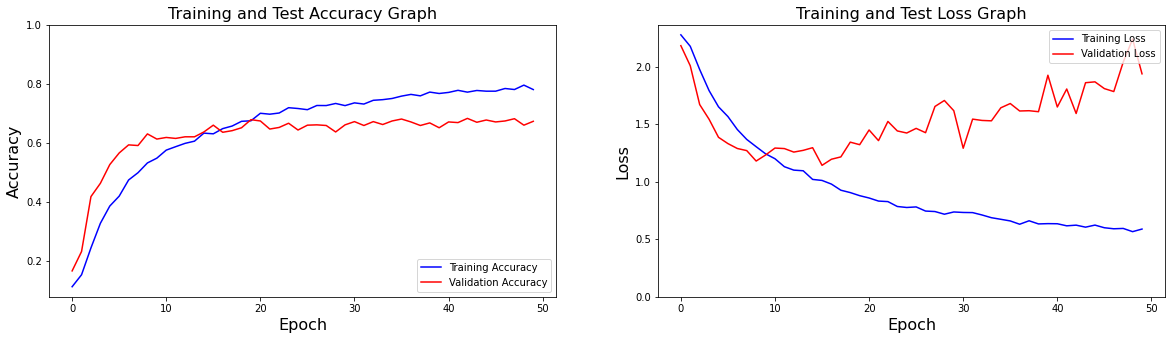

In [21]:
##############################
# Accuracy and Loss Graphs
##############################
def graphs(results):
    #-------------- Graph 1 Accuracy -------------- 

    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    plt.plot(results.history["accuracy"], color="b", label="Training Accuracy")
    plt.plot(results.history["val_accuracy"], color="r", label="Validation Accuracy")
    plt.legend(loc="lower right")
    plt.xlabel("Epoch", fontsize=16)
    plt.ylabel("Accuracy", fontsize=16)
    plt.ylim([min(plt.ylim()), 1])
    plt.title("Training and Test Accuracy Graph", fontsize=16)

    #-------------- Graph 2 Loss -------------- 

    plt.subplot(1, 2, 2)
    plt.plot(results.history["loss"], color="b", label="Training Loss")
    plt.plot(results.history["val_loss"], color="r", label="Validation Loss")
    plt.legend(loc="upper right")
    plt.xlabel("Epoch", fontsize=16)
    plt.ylabel("Loss", fontsize=16)
    plt.ylim([0, max(plt.ylim())])
    plt.title("Training and Test Loss Graph", fontsize=16)
    plt.show()
    
graphs(results)

It seems the model may be overfitted on 12th-13th epoch. Let's check test results.

In [22]:
# Evaluate the performance
loss, acc = model.evaluate(X_test, y_test) 
print("Loss: ",loss)
print("Accuracy", acc)

 1/29 [>.............................] - ETA: 2s - loss: 2.1949 - accuracy: 0.6250

2022-10-06 23:02:28.930108: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 80869888 exceeds 10% of free system memory.


29/29 [==============================] - 0s 6ms/step - loss: 2.2264 - accuracy: 0.6605
Loss:  2.2263739109039307
Accuracy 0.6604599952697754


# Hyperparameter Optimization

Now, try with different hyperparameters to improve model. In order to try with different values, let's make a function for model.

In [23]:
# initial values are from the first model
def model_hyperparameters(filters1=32, kernel_size=(3,3), activation="relu", filters2=64, dropout=0.5, optimizer="adam", 
                          batch_size=128, epochs=50, verbose=1, graph=False):
    
    model = tf.keras.Sequential()

    # Add a convolution and max pooling layer
    model.add(tf.keras.layers.Conv2D(filters1,
                                     kernel_size=kernel_size,
                                     strides=(1,1),
                                     padding="same",
                                     activation=activation,
                                     input_shape=(128,173,1)))

    model.add(tf.keras.layers.MaxPooling2D((2,2)))

    # Add more convolution and max pooling layers
    # 64 nodes randomly selected, can be adjusted later
    model.add(tf.keras.layers.Conv2D(filters2,
                                     kernel_size=kernel_size,
                                     strides=(1,1),
                                     padding="same",
                                     activation=activation,
                                     input_shape=(128,173,1)))

    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Conv2D(filters2,
                                     kernel_size=kernel_size,
                                     strides=(1,1),
                                     padding="same",
                                     activation=activation,
                                     input_shape=(128,173,1)))

    # Flatten the convolution layer
    model.add(tf.keras.layers.Flatten())

    # Add the dense layer and dropout layer
    # The number 64 here is also random
    model.add(tf.keras.layers.Dense(filters2, activation="relu"))
    model.add(tf.keras.layers.Dropout(dropout))

    # Add the dense layer and dropout layer
    model.add(tf.keras.layers.Dense(filters2, activation="relu"))
    model.add(tf.keras.layers.Dropout(dropout))

    # Add the output layer
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    
    model.compile(optimizer=optimizer,
              loss="categorical_crossentropy",
              metrics=["accuracy"])
    results = model.fit(X_train, y_train, 
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    verbose=verbose)
    print("Training Accuracy:", results.history["accuracy"][epochs-1])
    print("Validation Accuracy:", results.history["val_accuracy"][epochs-1])
    print("Training Loss:", results.history["loss"][epochs-1])
    print("Validation Loss:", results.history["loss"][epochs-1])
    
    # Evaluate the performance
    loss, acc = model.evaluate(X_test, y_test) 
    print("Loss for Test: ",loss)
    print("Accuracy for Test", acc)
    
    if graph:
        graphs(results)
        

In [24]:
model_hyperparameters(filters1=64, kernel_size=(3,3), activation="relu", filters2=128, dropout=0.5, optimizer="adam", batch_size=64, epochs=50)

Epoch 1/50
86/86 [==============================] - 6s 62ms/step - loss: 2.2429 - accuracy: 0.1451 - val_loss: 1.9554 - val_accuracy: 0.3001
Epoch 2/50
86/86 [==============================] - 4s 49ms/step - loss: 1.9267 - accuracy: 0.2645 - val_loss: 1.6729 - val_accuracy: 0.4074
Epoch 3/50
86/86 [==============================] - 4s 50ms/step - loss: 1.6187 - accuracy: 0.4012 - val_loss: 1.3997 - val_accuracy: 0.5027
Epoch 4/50
86/86 [==============================] - 4s 49ms/step - loss: 1.3547 - accuracy: 0.5088 - val_loss: 1.2490 - val_accuracy: 0.6035
Epoch 5/50
86/86 [==============================] - 4s 50ms/step - loss: 1.1253 - accuracy: 0.6055 - val_loss: 1.1725 - val_accuracy: 0.6462
Epoch 6/50
86/86 [==============================] - 4s 50ms/step - loss: 0.9857 - accuracy: 0.6602 - val_loss: 1.1998 - val_accuracy: 0.6287
Epoch 7/50
86/86 [==============================] - 4s 50ms/step - loss: 0.8556 - accuracy: 0.7142 - val_loss: 1.2674 - val_accuracy: 0.6659
Epoch 8/50
86

**WE GOT BETTER MODEL!**

verbose can be set as 0 in order to see only results, not epochs result. It helps to see much clear results for the next trials.

In [25]:
model_hyperparameters(filters1=128, kernel_size=(2,2), activation="tanh", filters2=256, dropout=0.4, optimizer="adam", batch_size=128, epochs=30, verbose=0)

Training Accuracy: 0.954735517501831
Validation Accuracy: 0.6265060305595398
Training Loss: 0.13169077038764954
Validation Loss: 0.13169077038764954
29/29 [==============================] - 1s 21ms/step - loss: 2.9814 - accuracy: 0.6473
Loss for Test:  2.9814229011535645
Accuracy for Test 0.6473165154457092


Epoch 1/30
86/86 [==============================] - 14s 142ms/step - loss: 2.0988 - accuracy: 0.1920 - val_loss: 1.6831 - val_accuracy: 0.3636
Epoch 2/30
86/86 [==============================] - 10s 114ms/step - loss: 1.5743 - accuracy: 0.4181 - val_loss: 1.3400 - val_accuracy: 0.5148
Epoch 3/30
86/86 [==============================] - 10s 114ms/step - loss: 1.1790 - accuracy: 0.5835 - val_loss: 1.1955 - val_accuracy: 0.6440
Epoch 4/30
86/86 [==============================] - 10s 114ms/step - loss: 0.9023 - accuracy: 0.6922 - val_loss: 1.2270 - val_accuracy: 0.6364
Epoch 5/30
86/86 [==============================] - 10s 114ms/step - loss: 0.7162 - accuracy: 0.7602 - val_loss: 1.2458 - val_accuracy: 0.6703
Epoch 6/30
86/86 [==============================] - 10s 113ms/step - loss: 0.5677 - accuracy: 0.8144 - val_loss: 1.2884 - val_accuracy: 0.6835
Epoch 7/30
86/86 [==============================] - 10s 114ms/step - loss: 0.4370 - accuracy: 0.8480 - val_loss: 1.4688 - val_accuracy: 0.6846

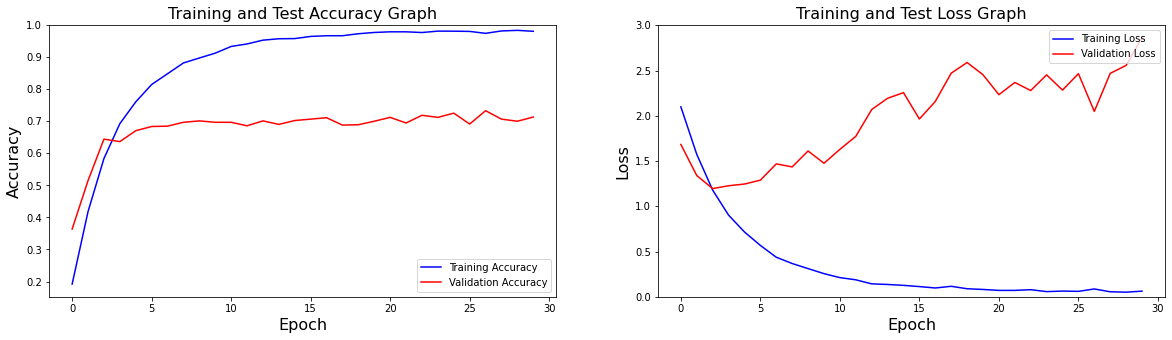

In [26]:
model_hyperparameters(filters1=128, kernel_size=(3,3), activation="relu", filters2=256, dropout=0.4, optimizer="adam", 
                      batch_size=64, epochs=30, graph=True)

We got the close one with the first tuning. Let's try a prediction.

### Try a prediction

In [27]:
# Make prediction on the reshaped sample.
prediction_result = model.predict(X_test[275].reshape(1,128,173,1))  # # .reshape => 1 image that has shape 128x173x1

# Print the prediction result
prediction_result

array([[9.6310372e-04, 1.1914994e-03, 1.1399300e-02, 2.2904646e-02,
        3.0179124e-03, 3.9673075e-02, 3.3293003e-05, 1.1189153e-03,
        9.1281807e-01, 6.8802456e-03]], dtype=float32)

In [28]:
classes = {0:"Air Conditioner", 1:"Car Horn", 2:"Children Playing", 3:"Dog Bark", 4:"Drilling", 5:"Enginge Idling",
           6:"Gun Shot", 7:"Jackhammer", 8:"Siren", 9:"Street Music"}
# Find the predicted class
predicted_class = prediction_result.argmax()
# Find the prediction probability
predicted_probability = prediction_result.max()

# Print the results
print(f"This image belongs to class {classes[predicted_class]} with {round(predicted_probability*100, 4)}% probability")

This image belongs to class Siren with 91.2818% probability


Finally, we can write a function for prediction, as well.

In [29]:
def prediction(pred):
    prediction_result = model.predict(pred.reshape(1,128,173,1))
    classes = {0:"Air Conditioner", 1:"Car Horn", 2:"Children Playing", 3:"Dog Bark", 4:"Drilling", 5:"Enginge Idling",
           6:"Gun Shot", 7:"Jackhammer", 8:"Siren", 9:"Street Music"}
    predicted_class = prediction_result.argmax()
    predicted_probability = prediction_result.max()
    print(f"This image belongs to class {classes[predicted_class]} with {round(predicted_probability*100, 4)}% probability")

In [30]:
prediction(X_test[123])

This image belongs to class Street Music with 59.2625% probability


In [31]:
prediction(X_test[0])

This image belongs to class Jackhammer with 99.9293% probability
